#  Fitting High-Resolution XPS Spectrum by DS Convolute Gaussian Function

### ·Abstrct
### ·How to run the notebook
### ·Methodology
####  ·Gaussian and DS functions
####  ·Example
### ·Experiment data fitting


## Abstact 
The principle and function of X-ray photoelectron spectroscopy (XPS) is to radiate the sample with X-rays, causing the inner electrons or valence electrons of atoms or molecules to be excited out. Electrons excited by photons are called photoelectrons. The energy of photoelectrons can be measured. With the kinetic energy of photoelectrons,(Eb=hv light energy -Ek kinetic energy -W work function) as the horizontal coordinate and the relative intensity (pulse /s) as the ordinate, the photoelectron spectra can be made. To obtain information about the sample. However, the total spectrum can only be obtain from experiment datas. Gaussian distribution and Doniach–Sunić(DS) distribution can effective describ the XPS spectrum. In this project, we will use Gaussian and DS function to describ the Mg(10-10) surface XPS spectrum by python.

## How to run the notebook
1. Install the Annoconda.
2. Run the Jupyter.
3. Install and activate the LUcompute environment described by the file environment.yml by running the following in a terminal.(in the environment.yml)

## Methodology

1. Gaussian function 

$$f(x, x_0,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\frac{-(x-x_0)^2}{2\sigma^2}} $$

2. DS function

$$f(x;\alpha, \omega, \gamma) = \frac{amp(1-\alpha)cos[\frac{\pi\alpha}{2}+(1-\alpha)arctan(\omega/\gamma)]}{(\omega^2+\gamma^2)^(1-\alpha)/2} $$

In [2]:
from IPython.display import Markdown

the mark in the functions:



|symble    |   meaning|
|--------  | -------- |
|$$x_0$$   |   location of the peak |
|$$\sigma$$   |  standard deviation |
|$$\omega$$   |  lifetime broadening |
|$$\alpha$$   |  sontrol skewing |
|$$\gamma$$   |  HWHM |

### Example, bulid a Gaussian data and fit it by Gaussian function:

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

import pandas
get_ipython().run_line_magic('matplotlib', 'inline')

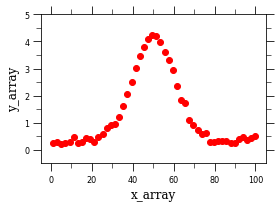

In [21]:
x_array = np.linspace(1,100,50)

q1 = 0
gamma1 = 20 
amp1 = 100
sigma1 = 10
sigma2 = 0.1
cen1 = 50

amp2 = 1
br=0.5
q2 = 0 
gamma2= 20
cen2 = -50

y_array_gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))


y_noise_gauss = (np.exp((np.random.ranf(50))))/5
y_array_gauss += y_noise_gauss
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_gauss, "ro")

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawGaussian.png", format="png",dpi=1000)




### Fitting process by Gaussian function:

No handles with labels found to put in legend.


amplitude = 118.36 (+/-) 2.65
center = 50.15 (+/-) 0.30
sigma = 11.54 (+/-) 0.30


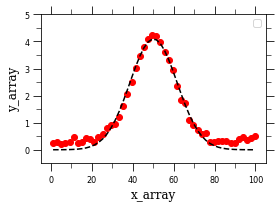

In [53]:
# define
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

# fitting
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, x_array, y_array_gauss, p0=[amp1, cen1, sigma1], bounds= ((-np.inf, 0,0),(np.inf,1000,1000)))

perr_gauss = np.sqrt(np.diag(pcov_gauss))

# result
print ("amplitude = %0.2f (+/-) %0.2f" % (popt_gauss[0], perr_gauss[0]))
print ("center = %0.2f (+/-) %0.2f" % (popt_gauss[1], perr_gauss[1]))
print ("sigma = %0.2f (+/-) %0.2f" % (popt_gauss[2], perr_gauss[2]))

#plot
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_gauss, "ro")
ax1.plot(x_array, _1gaussian(x_array, *popt_gauss), 'k--')#,\
         

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fitGaussian.png", format="png",dpi=1000)

#### The fitting result looks very good, we will bulid DS convolute Gaussian function that suit for the experiment data next step.

### Experiment data fitting (clean Mg(10-10) surface).

import experiment datas and plot it:

-47.35
-54.35
-50.85


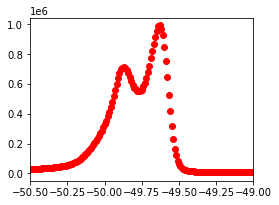

In [12]:
file1  = 'C:/Users/xingz/Desktop/fitting data/5.txt'
file2  = 'C:/Users/xingz/Desktop/fitting data/6.txt'
data1 = np.loadtxt(file1, dtype = str,delimiter='\t')
data2 = np.loadtxt(file2, dtype = str,delimiter='\t')

xarray1 = list()
for n in data1:
    xarray1.append(float(n))
    
yarray1 = list()
for n in data2:
    yarray1.append(float(n))
#print(xarrey1)

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])
ax1.plot(xarray1, yarray1, "ro")
ax1.set_xlim(-50.5,-49)
# print (yarray1)
e = np.max(xarray1)
f = np.min(xarray1)
print (e)
print (f)

mid = f +(e-f)/2
print (mid)


In [23]:
def _1ds(xarray1, mid, gamma,br,so, q1, amp1, cen1, sigma1):
    return np.exp(-2.773*(xarray1-mid)**2/(sigma1**2))*amp1*(np.cos(np.pi*q1/2+(1-q1)*np.arctan((xarray1-cen1)/(gamma/2)))*((xarray1-cen1)**2+(gamma/2)**2)**((q1-1)/2)) + \
           np.exp(-2.773*(xarray1-mid-so)**2/(sigma1**2))*(amp1*br*np.cos(np.pi*q1/2+(1-q1)*np.arctan((xarray1-cen1-so)/(gamma/2)))*((xarray1-cen1-so)**2+(gamma/2)**2)**((q1-1)/2))

In [16]:
# two peaks with br


q1 = 0.04
q2 = 0.04
amp1 = 3759
amp2 = 4155
cen1 = -49.825
cen2 = -49.945
sigma1 = 0.10
sigma2 = 0.2
gamma = 0.03
so = 0.2
br = 2
q3 = 0.042
amp3 = 0
cen3 = -49.739
sigma3 = 0.19866
mid1 = -49.82




def _2ds(x, mid, gamma,br,so,  q1, amp1, cen1, sigma1,q2, amp2,cen2, sigma2):
    return   np.exp(-2.773*(x-mid)**2/(sigma1**2))*amp1*(np.cos(np.pi*q1/2+(1-q1)*np.arctan((x-cen1)/(gamma/2)))*((x-cen1)**2+(gamma/2)**2)**((q1-1)/2)) +\
             np.exp(-2.773*(x-mid-so)**2/(sigma1**2))*amp1*br*(np.cos(np.pi*q1/2+(1-q1)*np.arctan((x-cen1-so)/(gamma/2)))*((x-cen1-so)**2+(gamma/2)**2)**((q1-1)/2))+\
             np.exp(-2.773*(x-mid)**2/(sigma2**2))*amp2*(np.cos(np.pi*q2/2+(1-q2)*np.arctan((x-cen2)/(gamma/2)))*((x-cen2)**2+(gamma/2)**2)**((q2-1)/2)) + \
             np.exp(-2.773*(x-mid-so)**2/(sigma2**2))*amp2*br*(np.cos(np.pi*q2/2+(1-q2)*np.arctan((x-cen2-so)/(gamma/2)))*((x-cen2-so)**2+(gamma/2)**2)**((q2-1)/2))

In [17]:
popt_2ds, pcov_2ds = scipy.optimize.curve_fit(_2ds, xarray1, yarray1,
                                              p0=[mid1, gamma,br,so,
                                                  q1, amp1, cen1, sigma1,
                                                  q2, amp2, cen2, sigma2] ,
                                              maxfev= 250000,
                                              bounds=(( -50.9,0,1.95,0,
                                                       0.03,0,-49.86,0,
                                                       0.0,0,-49.96,0), 
                                                      (-48.8, 0.6,2.05,0.3,
                                                       0.8,67000,-49.81,5.5,
                                                       0.8,70000,-49.91,5.5))
                                              )
                                               

perr_2ds = np.sqrt(np.diag(pcov_2ds))

pars_1 = popt_2ds[0:8]

pars_21 = popt_2ds[0:4]
pars_22 = popt_2ds[8:12]
pars_2 = np.append(pars_21,pars_22)

#pars_31 = popt_2ds[0:3]
#pars_32 = popt_2ds[11:15]
#pars_3 = np.append(pars_31,pars_32)

ds_peak_1 = _1ds(xarray1, *pars_1)
ds_peak_2 = _1ds(xarray1, *pars_2)
#ds_peak_3 = _1ds(xarray1, *pars_3)
peak_total = _2ds(xarray1, *popt_2ds)

print (popt_2ds)
print (pars_1)
print (pars_22)
print (pars_21)
print (pars_2)



[-5.00077615e+01  1.16738517e-01  1.95000000e+00  2.45865678e-01
  1.29178351e-01  6.69999999e+04 -4.98454330e+01  3.36521343e-01
  2.87770728e-01  1.02156425e+04 -4.99100000e+01  5.50000000e+00]
[-5.00077615e+01  1.16738517e-01  1.95000000e+00  2.45865678e-01
  1.29178351e-01  6.69999999e+04 -4.98454330e+01  3.36521343e-01]
[ 2.87770728e-01  1.02156425e+04 -4.99100000e+01  5.50000000e+00]
[-50.00776146   0.11673852   1.95         0.24586568]
[-5.00077615e+01  1.16738517e-01  1.95000000e+00  2.45865678e-01
  2.87770728e-01  1.02156425e+04 -4.99100000e+01  5.50000000e+00]


Plot result

No handles with labels found to put in legend.
No handles with labels found to put in legend.


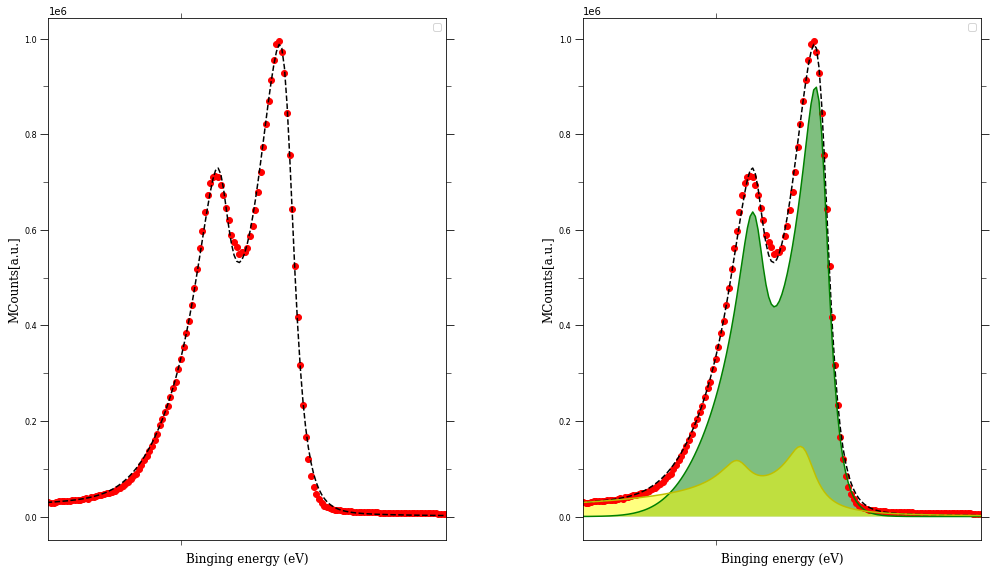

In [52]:
fig = plt.figure(figsize=(15,8.9))
gs = gridspec.GridSpec(1,2)
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)

ax1.plot(xarray1, yarray1, "ro")
ax1.plot(xarray1, _2ds(xarray1, *popt_2ds), 'k--')

ax1.set_xlim(-50.5,-49.0)
#ax1.set_ylim(-0.5,8)
ax1.set_xlabel("Binging energy (eV)",family="serif",  fontsize=12)
ax1.set_ylabel("MCounts[a.u.]",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian.png", format="png",dpi=300)


ax2.plot(xarray1, yarray1, "ro")
ax2.plot(xarray1, _2ds(xarray1, *popt_2ds), 'k--')#,\
        
# peak 1   
ax2.plot(xarray1, ds_peak_1, "g")
ax2.fill_between(xarray1, ds_peak_1, facecolor="green", alpha=0.5)
  
# peak 2
ax2.plot(xarray1, ds_peak_2, "y")
ax2.fill_between(xarray1,  ds_peak_2, facecolor="yellow", alpha=0.5) 

# peak 3
#ax1.plot(xarray1, ds_peak_3, "y")
#ax1.fill_between(xarray1,ds_peak_3, facecolor="yellow", alpha=0.5) 

ax2.set_xlim(-50.5,-49.0)
#ax1.set_ylim(-0.5,8)

ax2.set_xlabel("Binging energy (eV)",family="serif",  fontsize=12)
ax2.set_ylabel("MCounts[a.u.]",family="serif",  fontsize=12)

ax2.legend(loc="best")

ax2.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))

ax2.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian.png", format="png",dpi=300)







More distrbution detials can extract after spectum fitting. Analysis these detiald can get more information from the Mg(10-10) syrface. One distrbution is from bulk atoms, and another distrbution is from surface atoms.